# Continut
## [0. Importul bibliotecilor](#0)
## [1. Importul si analiza datelor](#1)
## [2. Modelul de baza K Nearest Neighbors](#2)
## [3. Selectarea valorii K prin metoda "cotului"](#3)
### [3.1. Selectarea valorii lui K](#31)
### [3.2. Modelul KNN cu cel mai bun K](#32)
## [4. Selectarea valorii K prin cross validation](#4)

<a id='0'></a>
# 0. Importul bibliotecilor

In [1]:
# importul bibliotecilor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='1'></a>
# 1. Importul si analiza datelor

In [4]:
# Importul fisierului cu date 'data_simple.csv' 
df = pd.read_csv('gene_expression.csv')

In [5]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [6]:
#vizualizarea informatie despre date (info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [7]:
# vizualizarea descrierii statistice a datelor (describe())
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [8]:
#vizualizarea numarului de clase din coloana label (value_counts())
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

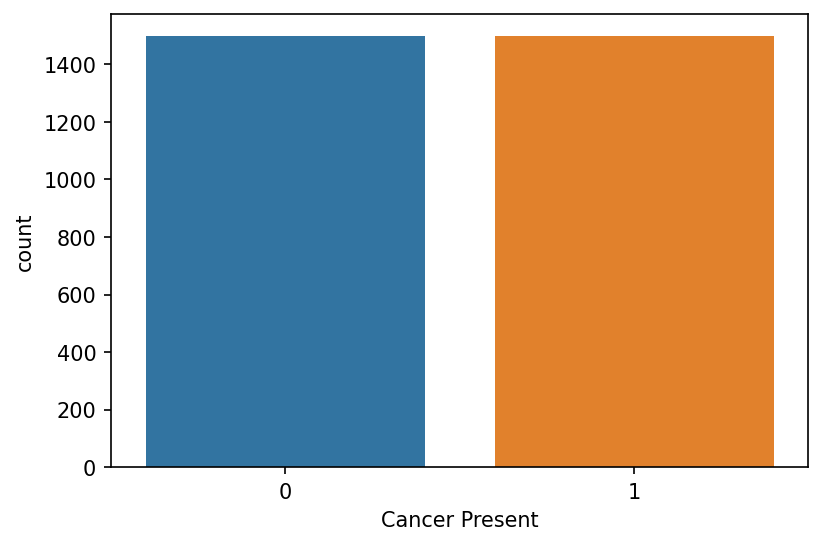

In [9]:
# vizualiazarea grafica a numarul de valori in fiecare clasa a coloanei eticheta (countplot)
plt.figure(dpi=150)
sns.countplot(data=df, x = 'Cancer Present')

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

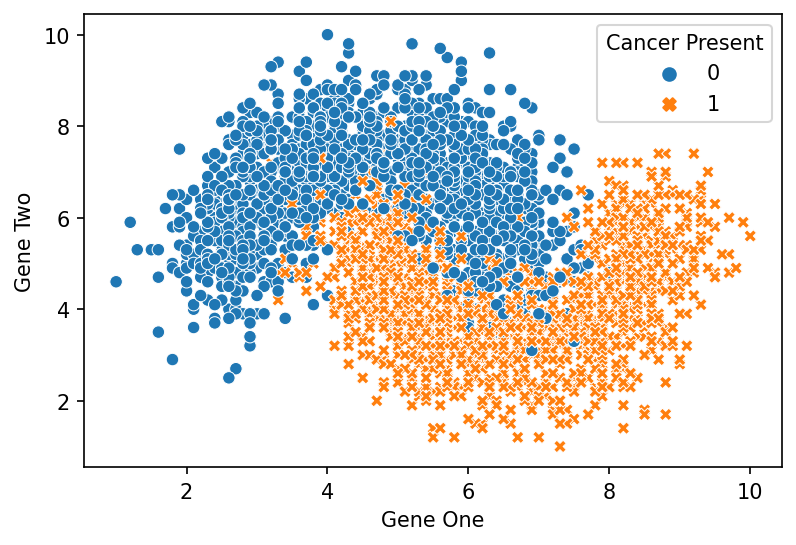

In [11]:
# vizualizarea grupării claselor in funcție de 2 caracteristici  (scatterplot())
plt.figure(dpi=150)
sns.scatterplot(data=df, x='Gene One',y='Gene Two',hue='Cancer Present', style = "Cancer Present")

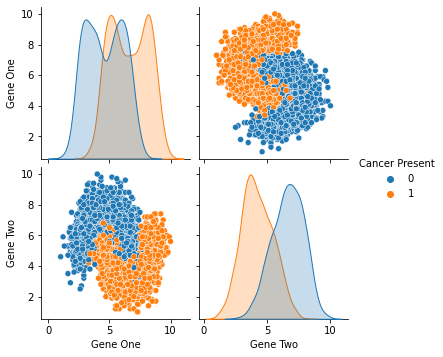

In [12]:
# vizuazlizarea pozitionarii distributiei punctelor in planul de caracteristici (pairplot())
sns.pairplot(data=df, hue = 'Cancer Present');

<a id='2'></a>
# 2. Modelul de baza K Nearest Neighbors

In [13]:
# crearea setului X si y
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [14]:
# crearea seturilor de train si de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [15]:
# Scalarea datelor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scalat = scaler.fit_transform(X_train)
X_test_scalat = scaler.transform(X_test)

In [25]:
# Importul si crearea modelului knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [26]:
# ajustarea modelului pe datele de training
model.fit(X_train_scalat, y_train)

KNeighborsClassifier()

In [27]:
# realizarea predicitei pe datele de test
y_pred = model.predict(X_test_scalat)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [28]:
# determinarea acurateti modelului
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9316666666666666

In [29]:
# determinarea confusion matrix a modelului
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[267,  16],
       [ 25, 292]], dtype=int64)

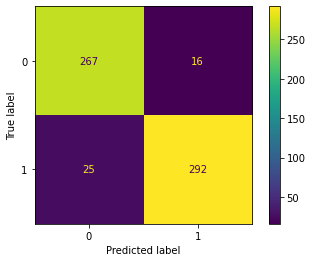

In [30]:
# vizualizarea grafica a confusion matrix a modelului
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

In [31]:
# elaborarea classificasion report a modelului
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       283
           1       0.95      0.92      0.93       317

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



<a id='3'></a>
# 3. Selectarea valorii K prin metoda "cotului"

<a id='31'></a>
## 3.1. Selectarea valorii lui K 

In [32]:
# crearea unei liste goale ce va pastra valorile erorilor
test_error_rates = []

In [33]:
# crearea unie bucle for ce permite crearea, ajustarea, predictia si determinarea erori pentru diferiti K 
for k in range(1,30):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scalat, y_train)
    
    y_pred = model.predict(X_test_scalat)
    
    test_error = 1-accuracy_score(y_test, y_pred)
    test_error_rates.append(test_error)

In [35]:
np.array(test_error_rates)

array([0.08833333, 0.08333333, 0.075     , 0.07833333, 0.06833333,
       0.07166667, 0.07      , 0.07166667, 0.07166667, 0.07166667,
       0.065     , 0.07333333, 0.06666667, 0.06833333, 0.06666667,
       0.07      , 0.07166667, 0.06833333, 0.06666667, 0.06666667,
       0.06666667, 0.065     , 0.06666667, 0.07      , 0.07      ,
       0.07      , 0.07      , 0.06833333, 0.06666667])

Text(0.5, 0, 'valoare lui K')

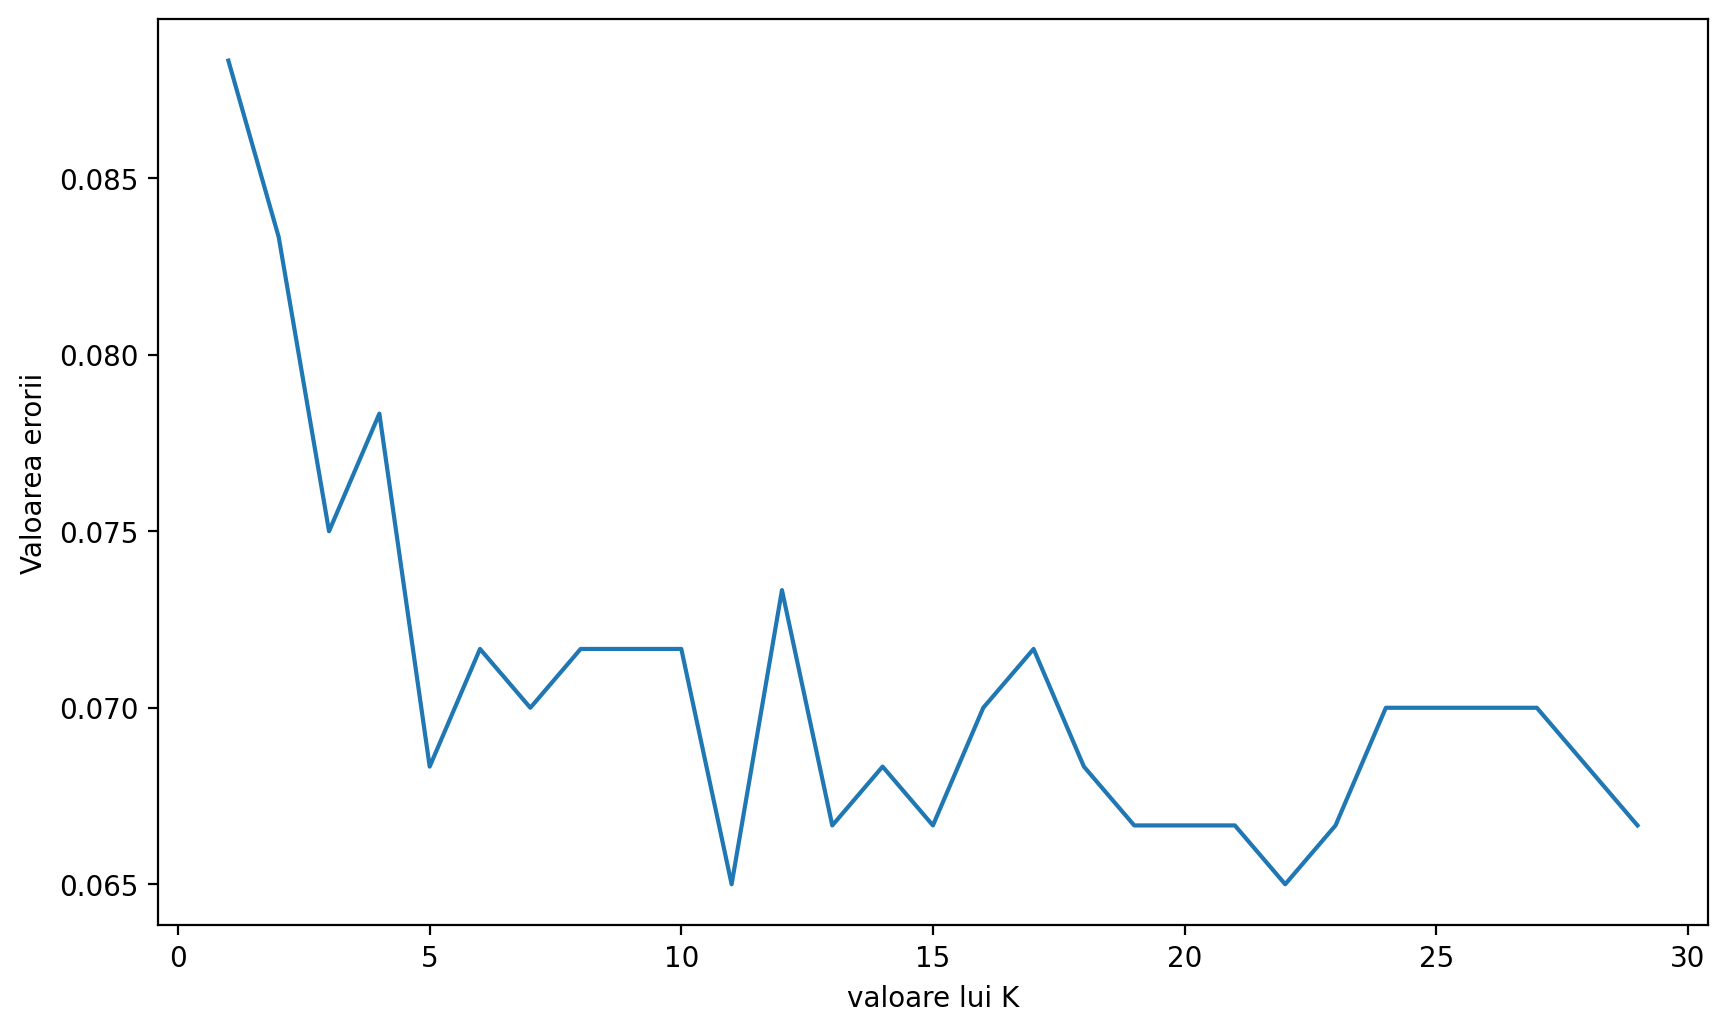

In [37]:
# afisarea grafica a dependentei erorii de valoarea k
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30), test_error_rates)
plt.ylabel("Valoarea erorii")
plt.xlabel("valoare lui K")

Se selecteaza valoare minima a lui K ce asigura o vaoarea minima a erorii adica k=11

<a id='32'></a>
## 3.2. Modelul KNN cu cel mai bun K

In [52]:
# Crearea modelului cu parametrul n_neighbors=11
model = KNeighborsClassifier(n_neighbors=11)

In [53]:
# ajustarea modelului pe datele de training
model.fit(X_train_scalat, y_train)

KNeighborsClassifier(n_neighbors=11)

In [54]:
# realizarea predicitei pe datele de test
y_pred = model.predict(X_test_scalat)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [55]:
# determinarea acurateti modelului
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.935

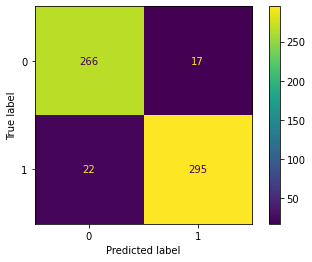

In [56]:
# vizualizarea grafica a confusion matrix a modelului
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()

In [57]:
# elaborarea classificasion report a modelului
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       283
           1       0.95      0.93      0.94       317

    accuracy                           0.94       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.94      0.94      0.94       600



<a id='4'></a>
# 4. Selectarea valorii K prin cross validation

In [38]:
# crearea unui model KNN implicit
knn=KNeighborsClassifier()

In [39]:
# vizuazlizarea liste de hiper parametri ai modelului (get_params().keys())
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [40]:
# crearea unui obiect de scalare implicit
scaler=StandardScaler()

In [41]:
# creara unei liste cu tupluri cu doua elemente - denumirea (string) si obiectul procesului ce se vor include in pipeline
operations = [('scaler', scaler), ('knn', knn)]

In [42]:
# importul si creara unui obiect pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [43]:
# creara unei liste cu valorile lui K
k_values = list(range(1,20))

In [44]:
# crearea unui disctionar cu hiperparametrii ce vor fi variati in obiectul pipeline (chile fac referinta si la procese din pipeline)
param_grid = {'knn__n_neighbors': k_values,
              'knn__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']}

In [45]:
# crearea modelului gridsearch
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')

In [46]:
# ajustarea modelului pe datele de training fara scalare
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=3; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__

[CV] END ..........knn__metric=euclidean, knn__n_neighbors=4; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=4; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metr

[CV] END ..........knn__metric=manhattan, knn__n_neighbors=7; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=7; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=7; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=8; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=8; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=8; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=8; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=8; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=9; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=9; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=9; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=9; total time=   0.0s
[CV] END ..........knn__metr

[CV] END .........knn__metric=chebyshev, knn__n_neighbors=11; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=11; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=11; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=11; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=11; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=13; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=13; total time=   0.0s
[CV] END .........knn__metri

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['minkowski', 'euclidean', 'manhattan',
                                         'chebyshev'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [47]:
# verificare celor mai buni hiperparametri ai pipeline
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=10))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=10),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 10,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [48]:
# realizarea predicitei pe datele de test fara scalare
y_pred = grid_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

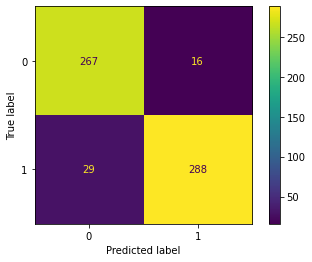

In [50]:
# vizualizarea grafica a confusion matrix a modelului
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()

In [51]:
# elaborarea classificasion report a modelului
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       283
           1       0.95      0.91      0.93       317

    accuracy                           0.93       600
   macro avg       0.92      0.93      0.92       600
weighted avg       0.93      0.93      0.93       600

